In [101]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pylab as plt
from dmba import gainsChart, liftChart
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPClassifier

In [102]:
universal_bank = pd.read_csv("UniversalBank.csv")

In [103]:
universal_bank.head()

universal_bank.columns = [x.strip().replace('.', '_') for x in universal_bank.columns]

universal_bank.head(20)

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,299,43,19,81,92069,2,3.2,1,0,0,0,0,0,0
1,2588,60,33,55,94998,4,2.5,2,0,0,0,0,1,0
2,1452,44,20,82,94555,4,1.4,2,201,0,0,0,1,1
3,3630,50,26,82,95051,1,0.0,1,0,0,0,0,1,1
4,1540,29,5,21,90601,3,0.9,3,119,0,0,0,0,0
5,4270,47,23,12,92518,4,0.5,2,0,0,0,0,0,0
6,2544,64,39,24,94117,4,0.6,2,0,0,0,0,0,0
7,2053,28,3,120,94080,1,0.8,1,170,0,0,0,0,0
8,1301,61,36,23,91754,2,0.5,2,103,0,0,0,1,0
9,3698,39,13,59,95616,3,0.5,3,0,0,0,0,0,0


#### Understand Data using Data Visualization. 

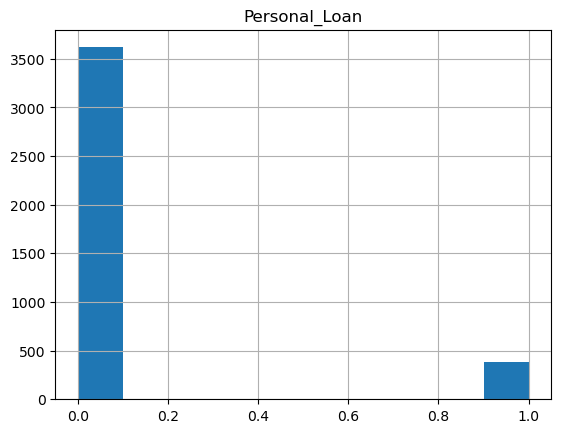

In [104]:
ax = universal_bank.hist(column='Personal_Loan')

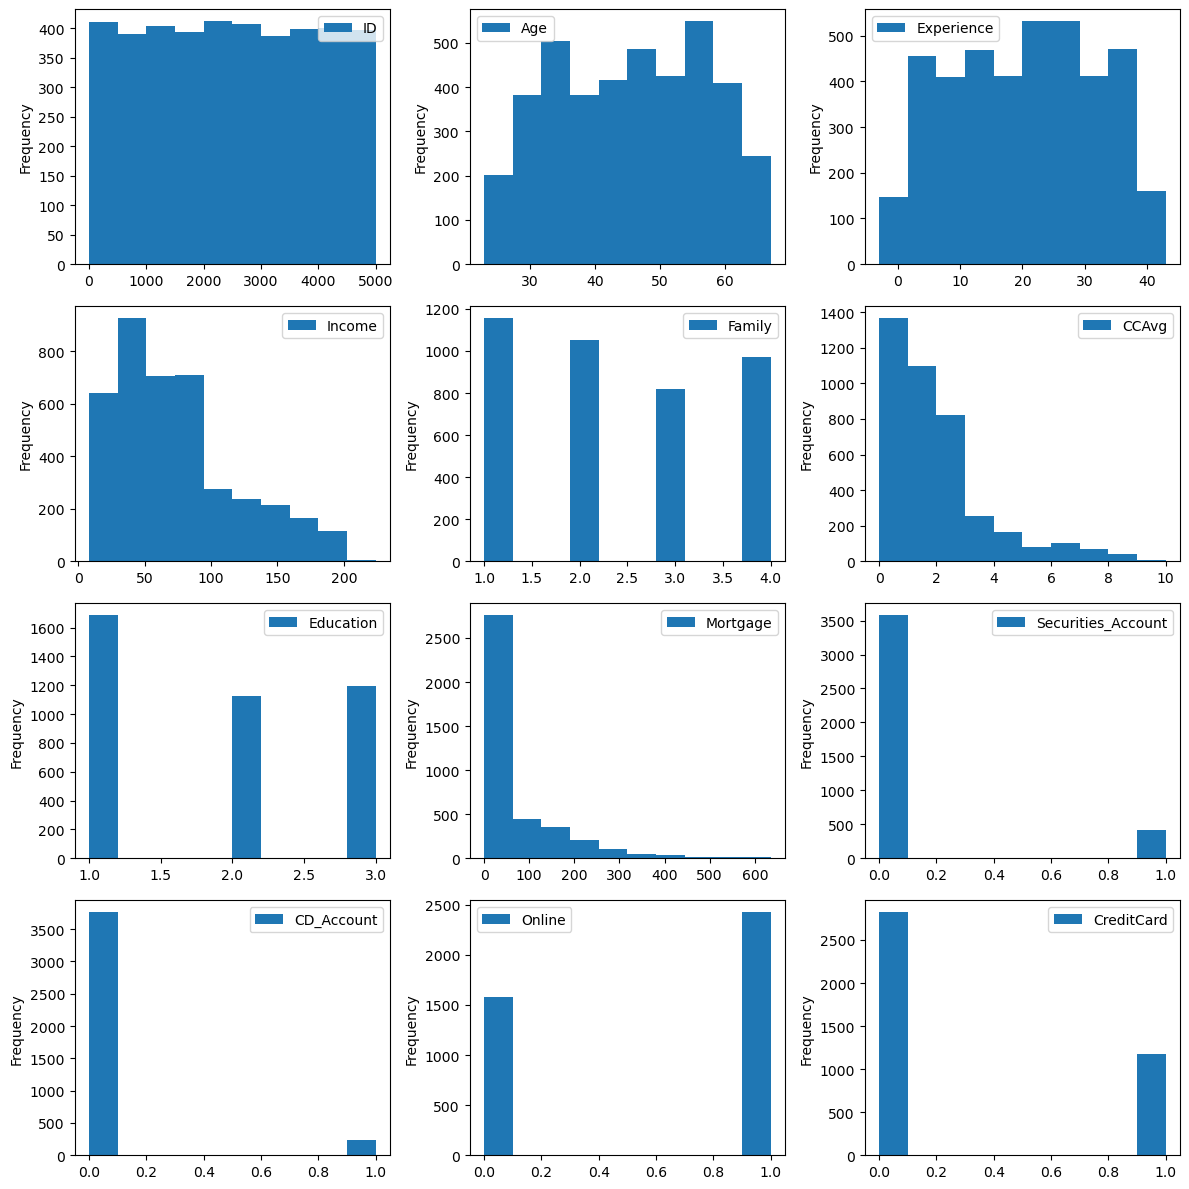

In [105]:
# Hist columns to personal loan
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 12))
columns = ['ID', 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
          'Securities_Account', 'CD_Account','Online', 'CreditCard']
for i, column in enumerate(columns):
    universal_bank.plot(kind='hist',  y=column ,ax=axes[i // 3, i % 3])
plt.tight_layout()

<AxesSubplot:>

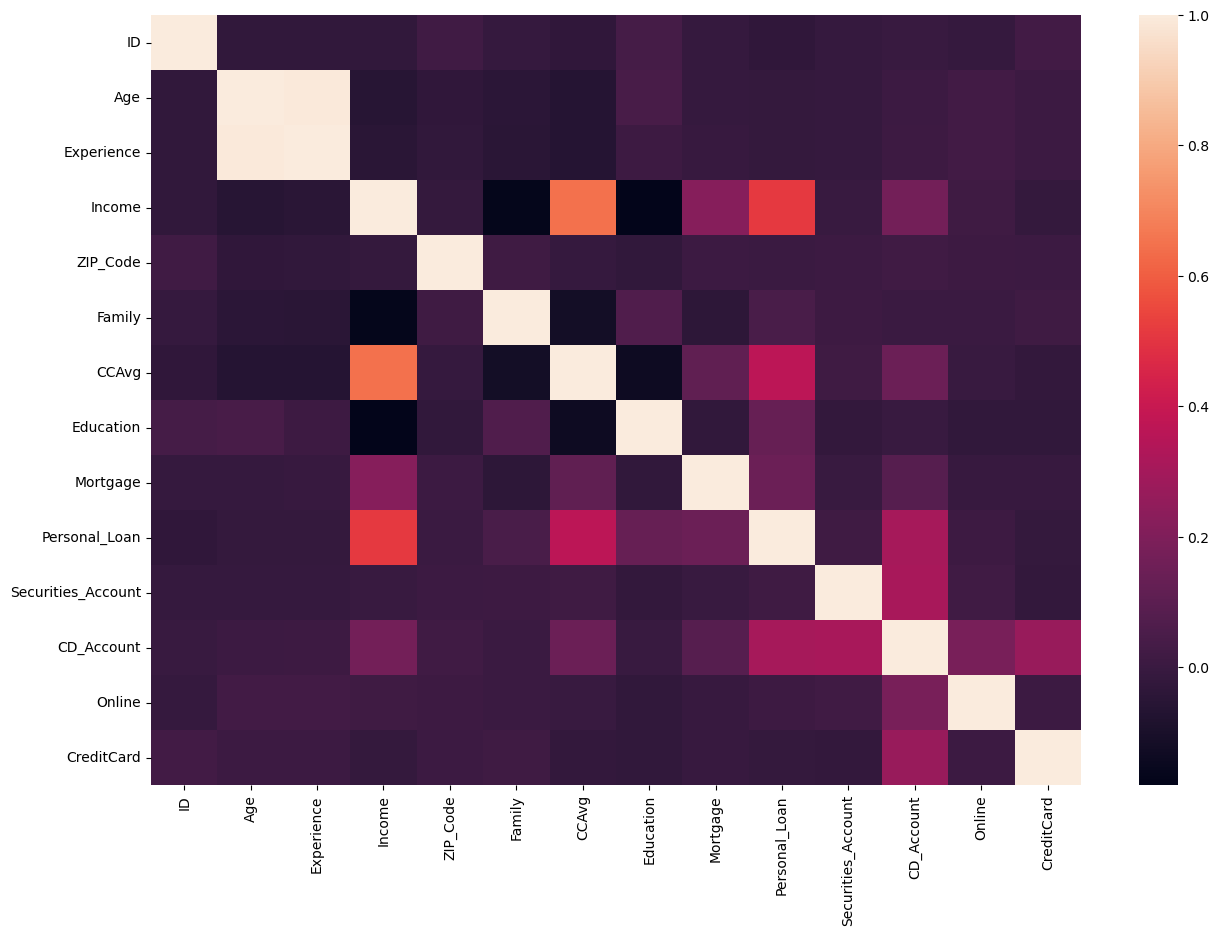

In [106]:
#heatmap
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(universal_bank.corr())

#### Inspecting Data
Check for missing values, data types, and determine which information or columns are useful in the analysis. 

In [107]:
print("data types: ",universal_bank.dtypes)
print("N/a values", universal_bank.isna().sum())

universal_bank.describe().T

data types:  ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP_Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object
N/a values ID                    0
Age                   0
Experience            0
Income                0
ZIP_Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
ID,4000.0,2494.600000,1442.596151,1.0,1251.25,2488.5,3742.25,5000.0
Age,4000.0,45.477750,11.424804,23.0,35.75,46.0,55.00,67.0
Experience,4000.0,20.245500,11.436670,-3.0,10.00,20.0,30.00,43.0
Income,4000.0,73.416500,45.999555,8.0,39.00,63.0,95.00,224.0
ZIP_Code,4000.0,93164.309750,2211.483166,9307.0,91942.00,93555.0,94610.00,96651.0
Family,4000.0,2.402000,1.142244,1.0,1.00,2.0,3.00,4.0
CCAvg,4000.0,1.925522,1.749129,0.0,0.70,1.5,2.50,10.0
Education,4000.0,1.876500,0.839002,1.0,1.00,2.0,3.00,3.0
Mortgage,4000.0,57.264500,102.605919,0.0,0.00,0.0,102.00,635.0
Personal_Loan,4000.0,0.095500,0.293941,0.0,0.00,0.0,0.00,1.0


In [108]:
universal_bank['CCAvg'] = universal_bank['CCAvg'].round(0).astype(int)

universal_bank.head()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,299,43,19,81,92069,2,3,1,0,0,0,0,0,0
1,2588,60,33,55,94998,4,2,2,0,0,0,0,1,0
2,1452,44,20,82,94555,4,1,2,201,0,0,0,1,1
3,3630,50,26,82,95051,1,0,1,0,0,0,0,1,1
4,1540,29,5,21,90601,3,1,3,119,0,0,0,0,0


In [109]:
#print(universal_bank['Experience']<0)
universal_bank.loc[universal_bank['Experience'] < 0]

universal_bank['Experience'] = np.where(universal_bank['Experience'] < 0, 0, universal_bank['Experience'])

universal_bank.loc[universal_bank['Experience'] < 0]

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


#### Data Partitioning 
Split data into training and testing set

In [110]:
universal_bank = universal_bank.drop(columns=['ID', 'ZIP_Code'])

train_df, valid_df = train_test_split(universal_bank, test_size=0.4,  random_state=1)
print('Training set:', train_df.shape, 'Validation set:', valid_df.shape)


outcome = 'Personal_Loan'
predictor = list(universal_bank.columns)
predictor.remove(outcome)

scaler = StandardScaler()
scaler.fit(train_df[predictor])

train_X = scaler.transform(train_df[predictor])
train_y = train_df[outcome]
valid_X = scaler.transform(valid_df[predictor])
valid_y = valid_df[outcome]

Training set: (2400, 12) Validation set: (1600, 12)


##### create function

In [111]:
def get_accuracy(train_X,train_y, valid_X, valid_y, model):
    modelPredOpt = model.predict(valid_X)
    print("\nThe model {0}".format(model))
    print("Overall accuracy on test set", metrics.accuracy_score(train_y, model.predict(train_X)).round(2))
    print("Overall accuracy on validation set: ",metrics.accuracy_score(valid_y, model.predict(valid_X)).round(2))
    print('\nConfusion Matrix')
    print(confusion_matrix(valid_y, modelPredOpt))
    print('\n \n')

#### KNN

In [112]:
knn_train_X, knn_train_y, knn_valid_X, knn_valid_y = train_X.copy(), train_y.copy(), valid_X.copy(), valid_y.copy()

k_value = []
for x in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=x).fit(knn_train_X, knn_train_y)
    k_value.append({'k': x,'accuracy': metrics.accuracy_score(knn_valid_y, knn.predict(knn_valid_X))})

k_values = pd.DataFrame(k_value)
print(k_values)#best k = 5

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(knn_train_X, knn_train_y)

get_accuracy(knn_train_X, knn_train_y, knn_valid_X, knn_valid_y, knn)

C:\Users\faywa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\faywa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

   k  accuracy
0  1  0.946875
1  2  0.948125
2  3  0.956250
3  4  0.946250
4  5  0.949375
5  6  0.945000
6  7  0.947500
7  8  0.944375
8  9  0.948125

The model KNeighborsClassifier()
Overall accuracy on test set 

C:\Users\faywa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\faywa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.97
Overall accuracy on validation set:  0.95

Confusion Matrix
[[1435    9]
 [  72   84]]

 



C:\Users\faywa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


####  Naive Bayes 
using Multinomial NB 

In [113]:
#processing data
ub_nb = universal_bank.copy()
ub_nb.agg(['min','max','median','mean','std','nunique','unique']).T

for column in ('Age', 'CCAvg'):
    ub_nb[column] = pd.cut(ub_nb[column], 5, labels=range(1,6)).astype('category')

for column in ('Income', 'Experience','Mortgage'):
    ub_nb[column] = pd.cut(ub_nb[column], 10, labels=range(1,11)).astype('category')

for column in ('Family','Education'):
    ub_nb[column] = ub_nb[column].astype('category')

    
predictor = pd.get_dummies(ub_nb.drop(columns=['Personal_Loan'])) 
outcome = ub_nb['Personal_Loan']

mnb_train_X, mnb_valid_X, mnb_train_y, mnb_valid_y = train_test_split(predictor, outcome, test_size = 0.4, random_state=1)

#perform multinomial nb
nb = MultinomialNB()
nb.fit(mnb_train_X, mnb_train_y)

get_accuracy(mnb_train_X, mnb_train_y, mnb_valid_X, mnb_valid_y, nb)


The model MultinomialNB()
Overall accuracy on test set 0.94
Overall accuracy on validation set:  0.92

Confusion Matrix
[[1372   72]
 [  53  103]]

 



#### Decision Tree

In [114]:
dt_train_X, dt_train_y, dt_valid_X, dt_valid_y = train_X.copy(), train_y.copy(), valid_X.copy(), valid_y.copy()

deepTree = DecisionTreeClassifier(random_state=1)
deepTree.fit(dt_train_X, dt_train_y)

print('Tree has {} nodes'.format(deepTree.tree_.node_count))


param_grid = {'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 15, 20, 25, 30, 35, 40]}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(dt_train_X, dt_train_y)
print('1st parameters: ', gridSearch.best_params_)

param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8], 
    'min_impurity_decrease': [0.0009, 0, 0.001, 0.0015, 0.002, 0.003, 0.004, 0.005], 
    'min_samples_split': [7, 8, 9, 10, 11, 12]}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(dt_train_X, dt_train_y)
print('2nd parameters: ', gridSearch.best_params_)

bestRegTree = gridSearch.best_estimator_
 

print('Tree has {} nodes'.format(bestRegTree.tree_.node_count))

deepTree = DecisionTreeClassifier(max_depth=3, min_impurity_decrease = 0.0015, min_samples_split= 7, 
                                  random_state=1)
deepTree.fit(dt_train_X, dt_train_y)
get_accuracy(dt_train_X, dt_train_y, dt_valid_X, dt_valid_y, deepTree)

Tree has 113 nodes
1st parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.005, 'min_samples_split': 10}
2nd parameters:  {'max_depth': 3, 'min_impurity_decrease': 0.0015, 'min_samples_split': 7}
Tree has 13 nodes

The model DecisionTreeClassifier(max_depth=3, min_impurity_decrease=0.0015,
                       min_samples_split=7, random_state=1)
Overall accuracy on test set 0.98
Overall accuracy on validation set:  0.98

Confusion Matrix
[[1444    0]
 [  31  125]]

 



#### Random Forest

In [115]:
#random forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=1)
random_forest.fit(train_X, train_y)
get_accuracy(train_X,train_y, valid_X, valid_y, random_forest)




The model RandomForestClassifier(random_state=1)
Overall accuracy on test set 1.0
Overall accuracy on validation set:  0.98

Confusion Matrix
[[1441    3]
 [  22  134]]

 



#### Logistic Regression

In [116]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
get_accuracy(train_X,train_y, valid_X, valid_y, lr)


The model LogisticRegression()
Overall accuracy on test set 0.96
Overall accuracy on validation set:  0.95

Confusion Matrix
[[1415   29]
 [  53  103]]

 



#### Nueral network

In [117]:
nn = MLPClassifier()
nn.fit(train_X, train_y)
get_accuracy(train_X,train_y, valid_X, valid_y, nn)


The model MLPClassifier()
Overall accuracy on test set 0.99
Overall accuracy on validation set:  0.98

Confusion Matrix
[[1436    8]
 [  24  132]]

 



C:\Users\faywa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


##### Calculations on models

C:\Users\faywa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier()


C:\Users\faywa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Overall accuracy on test set 0.97


C:\Users\faywa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Overall accuracy on validation set:  0.95


C:\Users\faywa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Lift based on meanResponse 5.705
[[1435    9]
 [  72   84]]


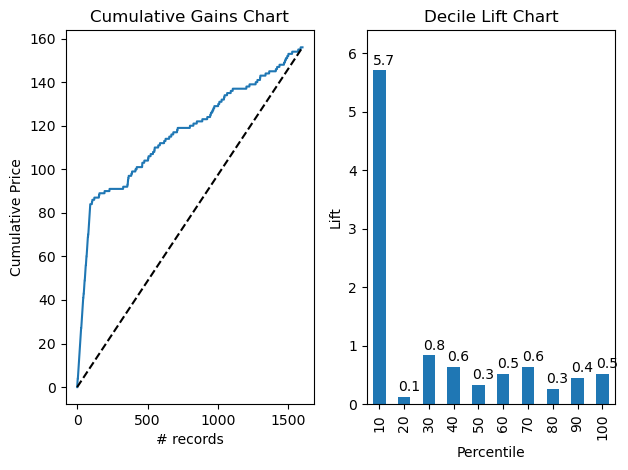



DecisionTreeClassifier(max_depth=3, min_impurity_decrease=0.0015,
                       min_samples_split=7, random_state=1)
Overall accuracy on test set 0.98
Overall accuracy on validation set:  0.98
Lift based on meanResponse 8.013
[[1444    0]
 [  31  125]]


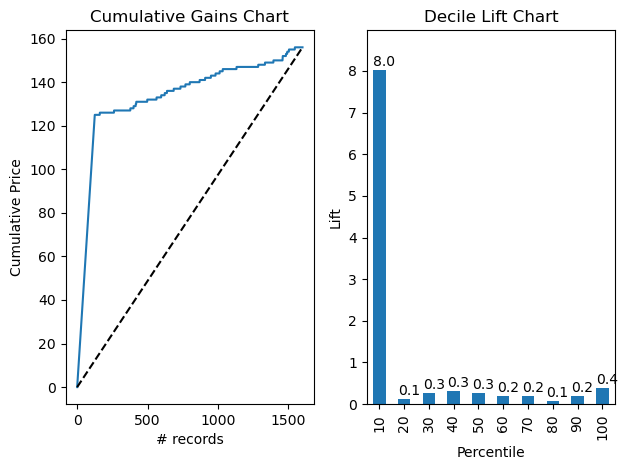



RandomForestClassifier(random_state=1)
Overall accuracy on test set 1.0
Overall accuracy on validation set:  0.98
Lift based on meanResponse 8.59
[[1441    3]
 [  22  134]]


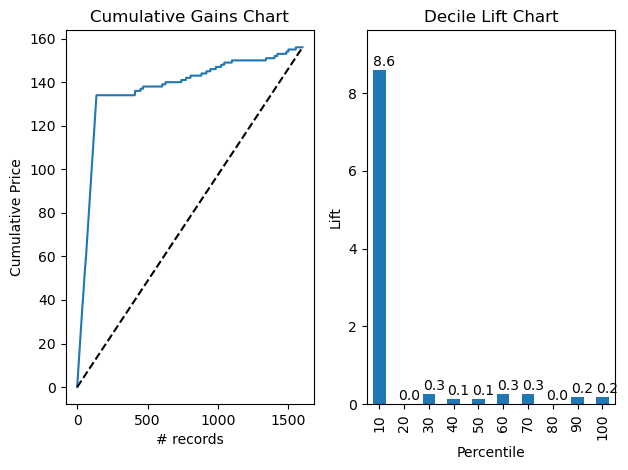



LogisticRegression()
Overall accuracy on test set 0.96
Overall accuracy on validation set:  0.95
Lift based on meanResponse 6.603
[[1415   29]
 [  53  103]]


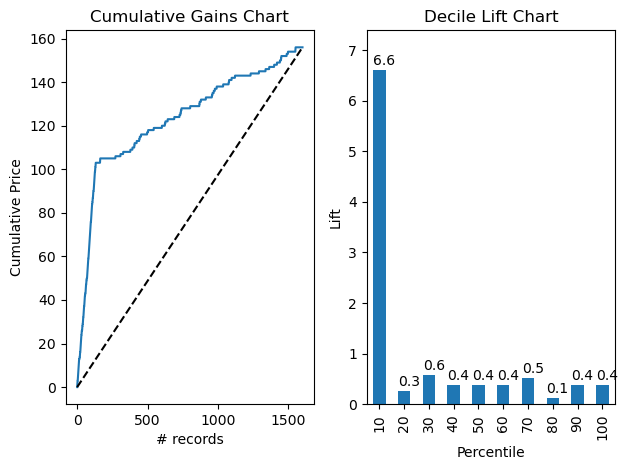



MLPClassifier()
Overall accuracy on test set 0.99
Overall accuracy on validation set:  0.98
Lift based on meanResponse 8.526
[[1436    8]
 [  24  132]]


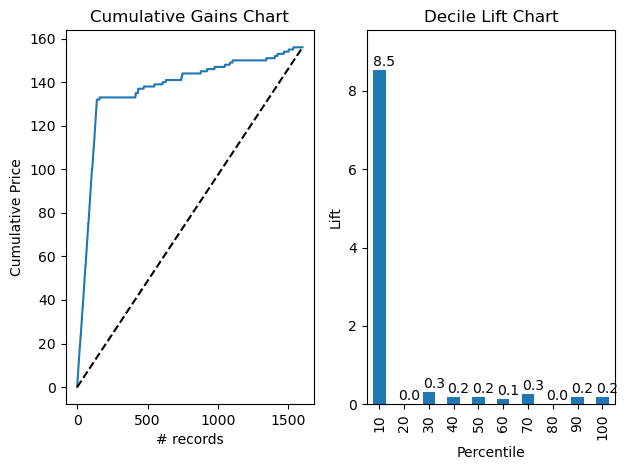

In [118]:
all_models = [knn,  deepTree, random_forest, lr, nn]


for x in all_models:
    modelPredOpt = x.predict(valid_X)
    print(x)
    print("Overall accuracy on test set", metrics.accuracy_score(train_y, x.predict(train_X)).round(2))
    print("Overall accuracy on validation set: ",metrics.accuracy_score(valid_y, x.predict(valid_X)).round(2))
    x = pd.DataFrame({'predicted': x.predict(valid_X),'actual': valid_y})
    x = x.sort_values(by=['predicted'], ascending=False)
    sorted_act_v = x['actual']
    groups = [int(10 * i / len(sorted_act_v)) for i in range(len(sorted_act_v))]
    meanResponse = sorted_act_v.groupby(groups).mean() / sorted_act_v.mean()
    meanResponse.index = (meanResponse.index + 1) * 10
    print('Lift based on meanResponse', meanResponse[10].round(3))
    print(confusion_matrix(valid_y, modelPredOpt))

    fig, axes = plt.subplots(nrows=1, ncols=2) #plots are next to each other
    ax = gainsChart(x['actual'], ax=axes[0]) #gains
    ax.set_ylabel('Cumulative Price')
    ax.set_title('Cumulative Gains Chart')
    ax = liftChart(x['actual'], ax=axes[1]) #lift
    ax.set_ylabel('Lift')
    plt.tight_layout()
    plt.show()
    print("\n")
    

##### Random Forest is best model 



In [119]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=1)
random_forest.fit(train_X, train_y)
y_pred = random_forest.predict(valid_X)

In [120]:
print('Mean Absolute Error:', metrics.mean_absolute_error(valid_y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(valid_y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(valid_y, y_pred)))
print('precision score:',metrics.precision_score(valid_y, y_pred))
print(metrics.roc_auc_score(valid_y, y_pred))
get_accuracy(train_X,train_y, valid_X, valid_y, random_forest)

Mean Absolute Error: 0.015625
Mean Squared Error: 0.015625
Root Mean Squared Error: 0.125
precision score: 0.9781021897810219
0.9284483983237445

The model RandomForestClassifier(random_state=1)
Overall accuracy on test set 1.0
Overall accuracy on validation set:  0.98

Confusion Matrix
[[1441    3]
 [  22  134]]

 

